In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [26]:
dataset = yf.download('SPOT', '2019-01-01', '2023-05-20', auto_adjust=True)
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,111.660004,115.629997,110.360001,113.739998,861100
2019-01-03,112.080002,113.345001,108.589996,109.019997,1082300
2019-01-04,112.059998,121.470001,111.500000,118.510002,2484800
2019-01-07,115.040001,123.865997,113.279999,119.360001,2516200
2019-01-08,121.440002,122.769997,114.699997,117.480003,1257100


In [27]:
def quick_analysis(df):
    print("Data Types:")
    print(df.dtypes)
    print("Rows and Columns:")
    print(df.shape)
    print("Column Names:")
    print(df.columns)
quick_analysis(dataset)

Data Types:
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object
Rows and Columns:
(1104, 5)
Column Names:
Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


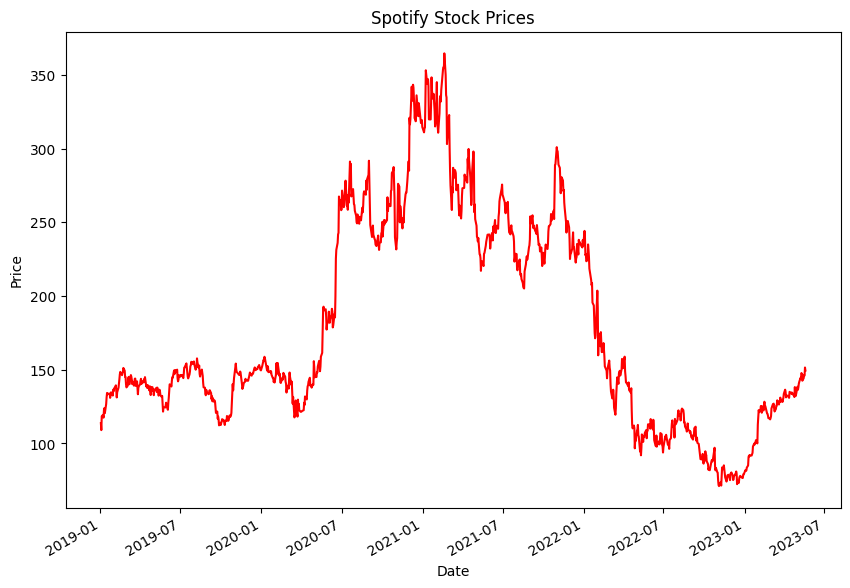

In [28]:
# Membuat DataFrame dari data harga saham
df = pd.DataFrame(dataset['Close'])
# Menghapus baris dengan nilai NaN
df.dropna(inplace=True)
dataset.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Price")
plt.title("Spotify Stock Prices")
plt.show()

In [29]:
# Menambahkan kolom 'Label' untuk menunjukkan apakah harga saham naik atau turun
df['Label'] = df['Close'].shift(-1) > df['Close']

In [30]:
# Membagi data menjadi fitur dan label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Membagi data menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Memprediksi label untuk set pengujian
y_pred = model.predict(X_test)

In [32]:
# Memprediksi label untuk seluruh data
df['Prediksi'] = model.predict(X)
middle_sample = df.sample(n=5, random_state=42)
sample_index = middle_sample.index

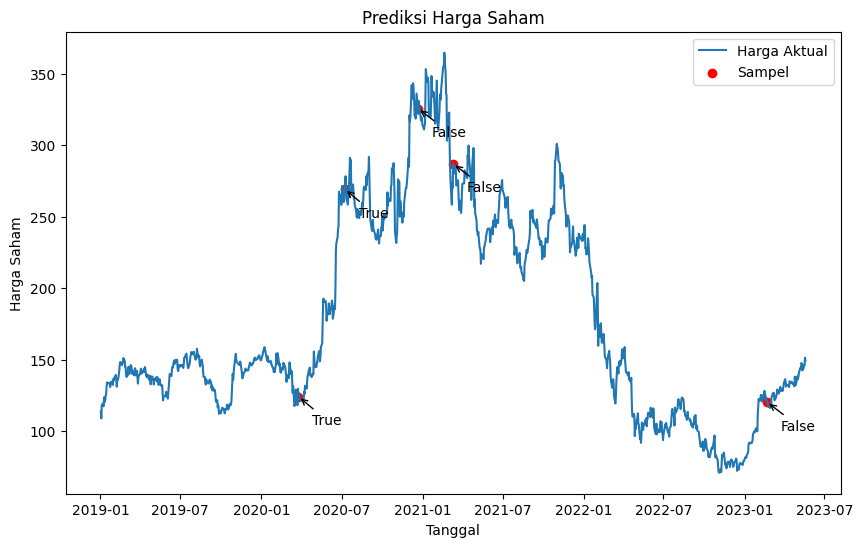

In [33]:
# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Harga Aktual')
plt.scatter(sample_index, middle_sample['Close'], color='red', label='Sampel')

# Menambahkan label True/False pada titik sampel
for index, row in middle_sample.iterrows():
    plt.annotate(str(row['Label']), (index, row['Close']), xytext=(10, -20),
                 textcoords='offset points', arrowprops=dict(arrowstyle="->", color='black'))

plt.xlabel('Tanggal')
plt.ylabel('Harga Saham')
plt.title('Prediksi Harga Saham')
plt.legend()
plt.show()

In [34]:
# Mencetak skor akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model: {:.2f}%".format(accuracy * 100))

Akurasi model: 53.85%


In [35]:
classification_report = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report)

Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.64      0.56       103
        True       0.59      0.45      0.51       118

    accuracy                           0.54       221
   macro avg       0.55      0.54      0.54       221
weighted avg       0.55      0.54      0.54       221

